In [11]:
import mne
import numpy as np

# Load your data (or a sample data with montage)
montage = mne.channels.make_standard_montage('standard_1020')  # For example, using standard 10-20 montage

# Extract the sensor positions (in 3D)
pos = montage.get_positions()['ch_pos']

# Convert 3D sensor locations to 2D (just an example using x, y coordinates)
sensor_names = list(pos.keys())
sensor_locs_2d = np.array([pos[name][:2] for name in sensor_names])

# Normalize the positions to fit into a grid (optional, based on your preference)
sensor_locs_2d -= sensor_locs_2d.min(axis=0)  # Shift to positive range
sensor_locs_2d /= sensor_locs_2d.max(axis=0)  # Normalize between 0 and 1

# Create a 2D grid
grid_size = (30, 30)  # Define the size of your grid
grid = np.zeros(grid_size)

# Assign your features to the grid (you need your features as a list)
features = np.zeros(len(sensor_locs_2d))  # Example feature vector
features[:] = 1

# Map sensor positions to grid indices
for i, loc in enumerate(sensor_locs_2d):
    x_idx = int(loc[0] * (grid_size[0] - 1))
    y_idx = int(loc[1] * (grid_size[1] - 1))
    grid[x_idx, y_idx] = features[i]

print("2D Feature Grid:")
print(grid)


2D Feature Grid:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

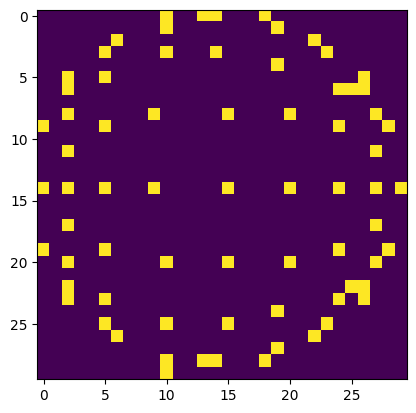

In [12]:
import matplotlib.pyplot as plt

plt.imshow(grid)